[Tabular_Value_approach.ipynb](data_processing/neural_networks/RL_Reinforced_Learning/M_Lapan_book/Tabular_Value_approach.ipynb)

MDP can be deterministic or stochastic. 
*   `Deterministic MDP`:

    In this case reward $R(s, a, s^\prime)$ for reaching state $s^\prime$ via action $a$ is predefined and guaranteed.
    $$R(s, a, s^\prime) = const$$
    Actions $a$ taken from state $s$ guides an agent to target state $s^\prime$ with 100% certainty.

    $$P_T(s,a,s^\prime) = \begin{cases} 1, \text{ Transition defined} \\ 0, \text{ Transition undefined} \end{cases}$$



*   `Stochastic MDP`:

    In this case rewards for reaching state can be sampled from a distribution and, in general, can be a funciton of initial and target states $s^\prime$ and action that was taken
    $$ 0 \leq P_R = P(r = R| s, a, s^\prime) \leq 1$$
    $$ \bar R(s,a,s^\prime) = \mathbb{E}[P_r(r,|s,a,s^\prime)] = \sum_r r \cdot P(r = r |s, a, s^\prime)$$
    $$\sum_{r} P(r| s,a,s^\prime) = 1$$
    and taking an action might result in visiting one of multiple states.
    $$ 0 \leq  P_T(s,a,s^\prime) \leq 1$$
    $$\sum_{s^\prime} P_T(s,a,s^\prime) = 1$$

***
In following example we will examine case where 
*   agent has only 2 actions: move  left or right.

*   In some states applying action might propel agent further than usual- this is stochasticity of action-target-state.

*   Depending on how big was the 'jump' agent gets a reward proportional to displacement

*   Chances of random action are pre-baked into environment (like icy patch in "Frozen Lake")



***
*   $p(s,a,s^\prime,r)$ shows tha smallest and most fundamental piece of information about the system
*   knowing it, you can calculate everything about the system using conditioning and marginalization
*   it can be analyzed by splitting into chain of conditional probabilities:
    $$p(s,a,s^\prime,r) = p(s) \cdot p(a|s) \cdot p(s^\prime|s,a) \cdot p(r|s,a,s^\prime)$$

*   part $p(s^\prime|s,a) \cdot p(r|s,a,s^\prime)$ is fully controlled by environment;
*   part $p(a|s) = \pi(a|s)$ is a policy, which describes an agent;
*   $p(s)$ is sort of complexity of a system.

We can isolate part controlled by environment by performing following conditioning:

$$p(s,a,s^\prime,r|s,a) = \frac{p((s \cap a \cap s^\prime \cap r) \cap (s \cap a))}{p(s \cap a)} = \frac{p(s \cap a \cap s^\prime \cap r)}{p(s \cap a)}= \frac{p(s,a,s^\prime ,r)}{p(s,a)}=  p(s^\prime,r|s,a)\Rightarrow$$
$$p(s^\prime,r|s,a) = \frac{p(s,a,s^\prime ,r)}{p(s,a)}=\frac{p(s) \cdot p(a|s) \cdot p(s^\prime|s,a) \cdot p(r|s,a,s^\prime)}{p(s)\cdot p(a|s)} = p(s^\prime|s,a) \cdot p(r|s,a,s^\prime)\Rightarrow$$
$$\boxed{p(s^\prime,r|s,a) = p(s^\prime|s,a) \cdot p(r|s,a,s^\prime)}$$
***

You can see that
$$\sum_r p(s^\prime,r|s,a) = \sum_r p(s^\prime|s,a) \cdot p(r|s,a,s^\prime) = p(s^\prime|s,a)  \cdot \sum_r p(r|s,a,s^\prime) = p(s^\prime|s,a) \cdot 1$$
so <i>Transition Probability </i>
$$\boxed{p(s^\prime|s,a) = \sum_r p(s^\prime,r|s,a)}$$

and normalization
$$\sum_{s^\prime} \sum_r p(s^\prime,r|s,a) = \sum_{s^\prime} p(s^\prime|s,a)  = 1$$


Alternatively, as a part of derivation:
$$\frac{p(s \cap a \cap s^\prime \cap r)}{p(s \cap a)} = \frac{p(s, a , s^\prime, r)}{p(s, a)} = p(s^\prime,r|s,a)$$

implies normalization by $p(s, a)$. 

Using marginalization we can show:
$$\sum_{r \in R} \sum_{s^\prime \in S} p(s^\prime, r|s,a)= \frac{\sum_{r \in R} \sum_{s^\prime \in S} p(s, a , s^\prime, r)}{p(s, a)}= \frac{p(s, a )}{p(s, a)} = 1$$

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx import grid_graph
from misc_tools.print_latex import print_tex

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

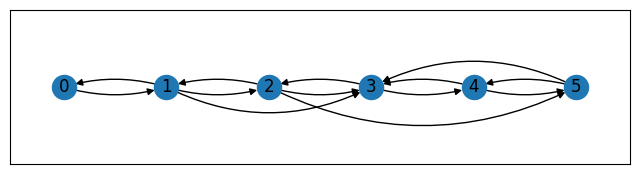

In [3]:
determenistic = False
np.random.seed(1)
num_nodes = 6
nodes_all = np.arange(num_nodes)
edges_1_step    = [(a,b, {'action': 'right'}) for a,b in zip(nodes_all[:-1],nodes_all[1:])]
edges_1_step_r  = [(b,a, {'action': 'left'}) for a,b,_ in edges_1_step]
edges_2_step    = edges_3_step = []

if not determenistic:
    edges_2_step = [(1,3, {'action': 'right'}), (5,3, {'action': 'left'})]
    edges_3_step = [(2,5, {'action': 'right'})]


G = nx.DiGraph(edges_1_step + edges_1_step_r)
G.add_edges_from(edges_2_step + edges_3_step)



pos = {i:np.array([i,0]) for i in nodes_all}
fig, ax = plt.subplots(1,1, figsize = (8,2))
nx.draw_networkx_nodes( G, pos,ax = ax)
nx.draw_networkx_labels(G, pos,ax = ax)
nx.draw_networkx_edges( G, pos,ax = ax, connectionstyle="arc3,rad=0.15", edgelist=edges_1_step + edges_1_step_r)
nx.draw_networkx_edges( G, pos,ax = ax, connectionstyle="arc3,rad=0.25", edgelist=edges_2_step + edges_3_step)

#nx.draw_networkx_edge_labels(   G, pos, edge_labels= edge_labels);
adj = nx.adjacency_matrix(G).todense()

In [4]:
a_right = 0
a_left = 1
actions = np.array([a_right,a_left])
actions_vis = np.array([[r'\rightarrow',r'\leftarrow']]).T

states_vis = np.array([[f's_{i}' for i in nodes_all]])
states_vis_a = np.hstack([[['a']], states_vis])
print_tex(states_vis,actions_vis.T )

<IPython.core.display.Math object>

## Define $P(r|s,a,s^\prime)$
Probability of giving some reward $r$ will be proportional to "jump" length:
$$p(r|s,a,s^\prime) = p(r|d(s, s^\prime)) = p(r|s, s^\prime)$$

In [5]:
# rewards = leap length, leap length +/- 1 for all leap lengths > 1
rewards = np.arange(3 + 2)
dists = rewards.copy()
if not determenistic:
    reward_action_dist_distr = np.array([   [1  , 0  , 0  , 0   , 0  ],
                                            [0.2, 0.6, 0.2, 0   , 0  ],
                                            [0  , 0.2, 0.6, 0.2 , 0  ],
                                            [0  , 0  , 0.2, 0.6 , 0.2],
                                            [0  , 0  , 0  , 0   , 1  ]])
else:
    reward_action_dist_distr = np.eye(len(rewards))

rewards_distr = {i:v for i,v in zip(dists, reward_action_dist_distr)}

a = np.array([[r'\cdot']+[f'p(r|d = {d})'  for d in dists]]).T
b = np.array([[f'P(r = {r})'        for r in rewards]])
c = np.hstack([a, np.vstack([b,reward_action_dist_distr])])
print_tex('p(r|d(s,s^\prime))=',c)
expected_rewards = {i:np.average(dists, weights=v).round(3) for i,v in zip(dists, reward_action_dist_distr)}


<IPython.core.display.Math object>

## Define $P(s^\prime|s,a)$
Probability to transition to state $s^\prime$ from $s$ via action $a$ will be "~inversely\reveserly" proportional to 'jump' length
$$p(s^\prime|s,a) = p(s^\prime|d(s, s^\prime)) = p(s^\prime|s)$$

In [6]:
if not determenistic:
    action_dist_distr = np.flip(dists**2+1)/(dists**2+1).sum()

action_dist_distr_d = {d:v for d,v in zip(dists, action_dist_distr)}
print_tex('p(s^\prime|s,a) = f(s, s^\prime) \Rightarrow ', np.array([[r'\text{distance}','p(dist)']]).T,np.vstack([dists, action_dist_distr.round(3)]), frmt='{:3.3f}')

<IPython.core.display.Math object>

## Construct   $p(s^\prime,r|s,a)$  from reward and transition distributions
$p(s^\prime,r|s,a)$ can be calculated if i know p-distribution for rewards for $p(r|s,a,s^\prime)$, each $(s,a,s^\prime)$ tuple, and distribution of transitions $p(s^\prime|s,a)$ to $s^\prime$
$$p(s^\prime,r|s,a) = p(s^\prime|s,a) \cdot p(r|s,a,s^\prime)$$

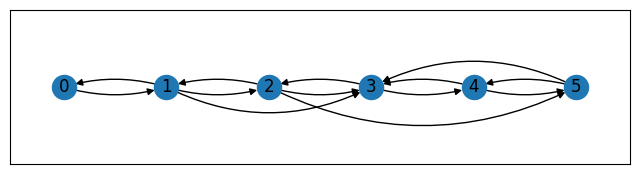

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
P_spr_sa = np.zeros((num_nodes, len(actions), num_nodes, len(rewards)))
display(fig)
for i in G.nodes():
    neighbors   = list(G.neighbors(i))
    dists_n     = np.abs(np.array(neighbors) - i)
    actions_n   = [G.edges[(i,j)]['action'] for j in neighbors]
    w_left,w_right  = np.zeros((2,num_nodes))

    for d,a in zip(dists_n, actions_n):
        if a == 'left': w_left[d]   = action_dist_distr_d[d]
        else:           w_right[d]  = action_dist_distr_d[d]

    if w_left.sum() > 0:w_left  /= w_left.sum()
    if w_right.sum()> 0:w_right /= w_right.sum()

    for n,d,a in zip(neighbors,dists_n, actions_n):    
        action      = a_right
        sa_weights  = w_right
        if a == 'left': 
            action      = a_left
            sa_weights  = w_left
        P_spr_sa[i, action , n] = rewards_distr[d]*sa_weights[d]

a = np.array([[r'\cdot']+[f's^\prime = s_{n}'  for n in range(num_nodes)]]).T
b = np.array([[f'P(r = {r})'        for r in rewards]])
c = np.hstack([a, np.vstack([b,P_spr_sa[5,1].round(3)])])
print_tex(r'p(r,s^\prime|,s a)[s = s_5, a = \text{"left"}]=',c)


zz = np.vstack([states_vis_a, np.hstack([actions_vis,P_spr_sa.sum(axis = (-2,-1)).T.round(3)])]).T
print_tex('\sum_{s^\prime, r} P(s^\prime,r|s,a)= ', zz)   


## Test if we can recover $p(r|s,a,s^\prime)$

$$p(r|s,a,s^\prime) = \frac{p(s^\prime,r|s,a)}{p(s^\prime|s,a)}$$

$$p(s^\prime|s,a) = \sum_r p(s^\prime,r|s,a)$$

In [8]:
p_sp_sa = P_spr_sa.sum(axis = (-1), keepdims = True)

p_r_sasp = np.divide(P_spr_sa, p_sp_sa, out=np.zeros_like(P_spr_sa), where= (p_sp_sa != 0))

a = np.array([[r'\_']+[f's^\prime = s_{i}'  for i in range(num_nodes)]]).T
b = np.array([[f'P(r = {r})'        for r in rewards]])
c = np.hstack([a, np.vstack([b, p_r_sasp[1,a_right] ])])

print_tex(r'p(r|s = s_1,a = \text{"right"})=',c)


<IPython.core.display.Math object>

## Calculate expected reward $r(s,a,s^\prime)$ for <i>state-action-next-state</i> triplet
Given that
$$p(r|s,a,s^\prime) = \frac{p(s^\prime,r|s,a)}{p(s^\prime|s,a)}$$
Expected reward for <i>state-action-next-state</i> triplet is
$$r(s,a,s^\prime) = \mathbb{E}_r[p(r|s,a,s^\prime) ] = \sum_r  r\cdot p(r|s,a,s^\prime) = \sum_r  r\cdot \frac{  p(s^\prime,r|s,a)}{p(s^\prime|s,a)}$$

$$\boxed{r(s,a,s^\prime) = \frac{\sum_r  r\cdot p(s^\prime,r|s,a)}{p(s^\prime|s,a)}}$$
<i>Note: we can do top part via matrix multiplication because its a dot product of arrays $\vec{P_r} \cdot \vec{R}$ with Reward vector (for all $s$ and $a$)</i>

expected reward for state-action-next-state triplet


<IPython.core.display.Math object>

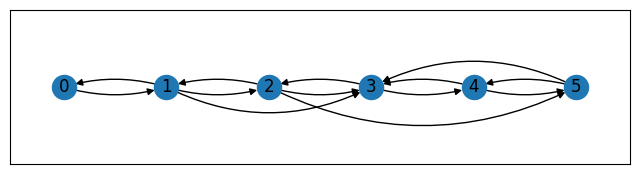

(jump length: rew) expected_rewards = {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0}


In [9]:
r_sas_top = (P_spr_sa @ rewards)[...,None]
r_sas = np.divide(r_sas_top, p_sp_sa, out = np.zeros_like(r_sas_top), where= (p_sp_sa != 0))
r_sas= np.squeeze(r_sas,-1)
test_node = 1
print(f'expected reward for state-action-next-state triplet')

print_tex(f'r(s,a,s^\prime)[s = {test_node}]=',np.vstack([states_vis_a,
                     np.hstack([actions_vis,r_sas[test_node]])]))
display(fig)
print(f'(jump length: rew) {expected_rewards = }')

### How to calculate expected reward $r(s,a) = \mathbb{E}_{s^\prime}[r(s,a,s^\prime)]$ for state-action pair?
Expected reward for state-action pair is $\mathbb{E}_{s^\prime}[r(s,a,s^\prime)]$

$$r(s,a) = \sum_{s^\prime \in S} p(s^\prime | s,a) \cdot r(s,a,s^\prime)   =  \sum_{s^\prime \in S} p(s^\prime | s,a) \cdot \frac{\sum_{r \in R} r \cdot p(s^\prime, r|s,a)}{p(s^\prime | s,a) } = \sum_{r \in R} \sum_{s^\prime \in S} r \cdot p(s^\prime, r|s,a) $$
$$\boxed{r(s,a) =  \sum_{r \in R} \sum_{s^\prime \in S} r \cdot p(s^\prime, r|s,a) }$$
Clearly, its some operation between reward vector $\vec{R}$ and $P$ matrix ($s,a$ dimensions dropped for clarity, $s^\prime \rightarrow s$):
$$\Rightarrow \sum_r  \sum_s (\vec{R})_r  \cdot P_{s,r} = \sum_s \left( \sum_r  P_{s,r} \cdot (\vec{R})_r  \right) =  $$
$$ =\left| \sum_s  P_{s,r} \cdot (\vec{R})_r = (\vec{S})_r \Leftrightarrow P\vec{R} = \vec{S} \right|= \sum_s (\vec{S})_s
$$
Or with $s,a$ dimensions:
$$r(s,a) = \sum_{s^\prime} \left( \sum_r  P_{s,a, s^\prime,r} \cdot (\vec{R})_r  \right)$$

<IPython.core.display.Math object>

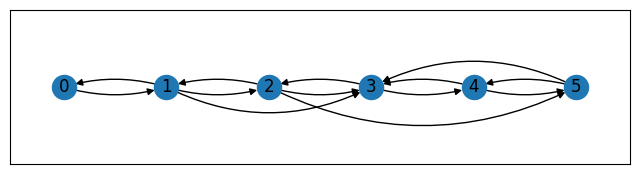

In [10]:
r_sa = (P_spr_sa @ rewards).sum(axis=(-1))
print_tex(f'r(s,a) =', np.array([['a'] +[f's_{i}' for i in nodes_all]]).T,
          np.vstack([actions_vis.T,np.round(r_sa,1)]))
display(fig)

# Everything past this stage is not refined/correct

<i>We can see that expected rewards for transitions in direction with multiple outcomes are more favorable.

<b>We could</b> develop a policy for best action $a$ at state $s$: $a = \pi(s)$, only based on <u>immediate</u> reward. Thus by</i>

$$\pi(s) = \underset{a}{\mathrm{Argmax}} \left[ r(s,a) \right]$$

But it is only one many options. Lets test it.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

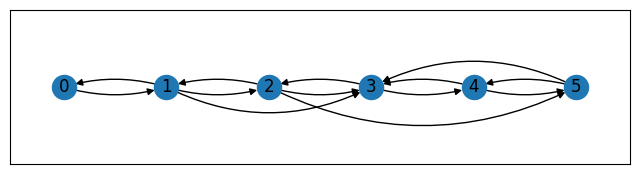

In [11]:
pi_s = np.argmax(r_sa, axis= -1)    # ties are broken by selecting 0 = right action
print_tex(r'\text{policy }\pi(s):')
print_tex(np.vstack([states_vis, np.array([actions_vis[i] for i in pi_s]).T]))
display(fig)

Expected reward for visiting a state under policy $\pi$ is
$$r(s) = \mathbb{E}[r(s,a = \pi(s), s^\prime)] = \sum_{s^\prime \in S} p(s^\prime | s, a = \pi(s))\cdot r(s,a = \pi(s), s^\prime)$$
Means: my policy tells me to do action $a = \pi(s)$ at state $s$. This action can lead to states $s^\prime \in S$ with some chance $p(s^\prime | s, a = \pi(s))$ where you get expected reward $r(s,a = \pi(s), s^\prime)$

In [13]:
p_sp_spi    = p_sp_sa[np.arange(num_nodes),pi_s]    # selecting a from policy
print_tex(  "p(s^\prime | s, a = \pi(s)) = ",
            np.vstack([states_vis, np.squeeze(p_sp_spi,-1).round(2)]), 
            np.array([['a']]+[actions_vis[i] for i in pi_s]))

<IPython.core.display.Math object>

In [ ]:
r_spis = r_sas[np.arange(num_nodes),pi_s]
print_tex(  "r(s,a = \pi(s), s^\prime) = ",
            np.vstack([states_vis, r_spis.round(1).astype(int)]), 
            np.array([['a']]+[actions_vis[i] for i in pi_s]))

<IPython.core.display.Math object>

You can notice that $$r(s) = \mathrm{max}_a r(s,a)$$ that is because we actually have chosen our policy to be greedy
$$\pi(s) = \underset{a}{\mathrm{Argmax}} \left[ r(s,a) \right]$$

In [ ]:
r_s = (p_sp_spi * r_spis).sum(axis = -1)
print_tex(np.vstack((states_vis,r_s.round(5))))

<IPython.core.display.Math object>

$$\boxed{v(s) = r(s) + \gamma \sum_{s^\prime \in S} p(s^\prime | s, a = \pi(s)) \cdot v(s^\prime)} \ ( \forall s \in S)$$

Means that there are $|S|$ equations 

$$
\begin{cases}
v(s_0) = r(s_0) + \gamma \sum_{s^\prime \in S} p(s^\prime | s_0, a = \pi(s_0)) \cdot v(s^\prime)\\
v(s_1) = r(s_1) + \gamma \sum_{s^\prime \in S} p(s^\prime | s_1, a = \pi(s_1)) \cdot v(s^\prime)\\
\dots\\
v(s_n) = r(s_n) + \gamma \sum_{s^\prime \in S} p(s^\prime | s_n, a = \pi(s_n)) \cdot v(s^\prime)
\end{cases}$$

or given that
$$\sum_{s^\prime \in S} p(s^\prime | s_0, a = \pi(s_0)) \cdot v(s^\prime) = P_{row \ 0} \cdot \vec{v}$$
can be written in matrix form
$$\vec{v} = \vec{r} + \gamma P_{s,s^\prime}\vec{v} \rightarrow \vec{v}(1 - \gamma P_{s,s^\prime}) = \vec{r} \rightarrow \vec{v} = ((1 - \gamma P_{s,s^\prime}))^{-1} \vec{r}$$


In [ ]:
gamma = 0.9
print_tex(np.linalg.inv(1 - gamma*p_sp_spi) @ r_s)

<IPython.core.display.Math object>